In [162]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA


In [163]:
datos = pd.read_csv ("Mall_Customers.csv")

datos = datos.set_index('CustomerID')

dic = {'Male': 1, 'Female': 0}
#Reemplazar datos Texto por Numéricos
datos['Gender'] = datos['Gender'].replace(dic).astype(int)

display (datos.head())
display (datos.tail())

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74
199,1,32,137,18
200,1,30,137,83


In [164]:
display (datos.describe())

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [165]:
display (datos.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 7.0 KB


None

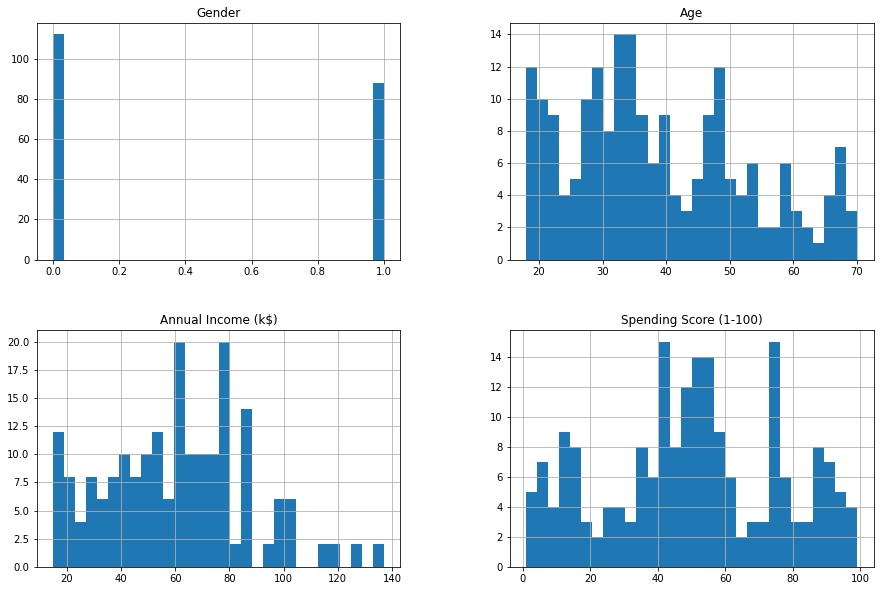

In [166]:
datos.hist(bins=30, figsize=(15, 10))
plt.show()

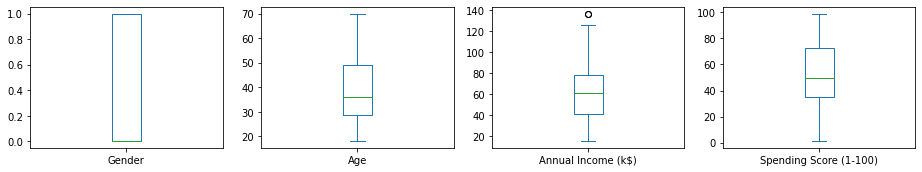

In [167]:
datos.plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 15))
plt.show()


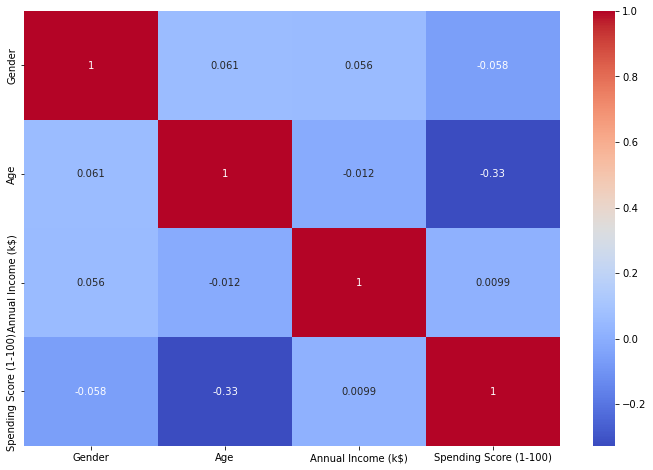

In [168]:
plt.figure(figsize=(12, 8))
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm')
plt.show()


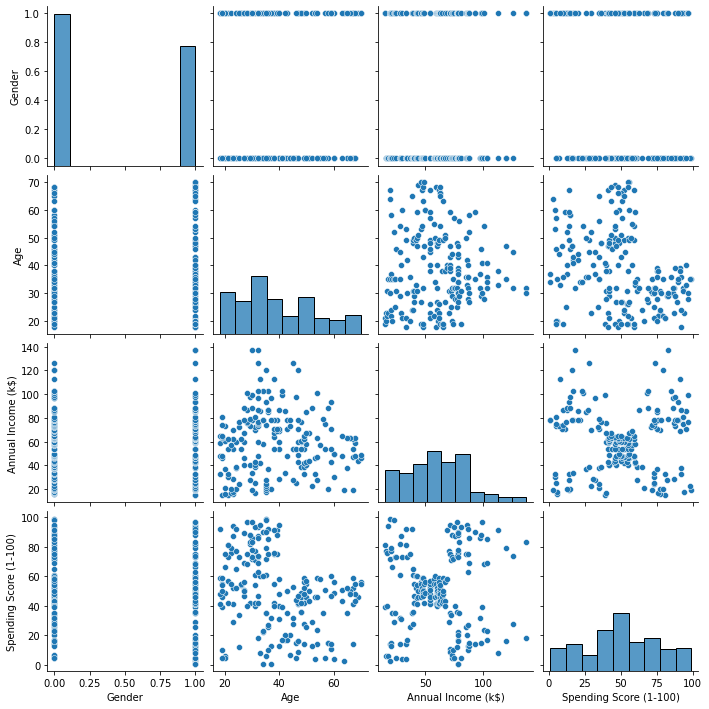

In [169]:
sns.pairplot(datos)
plt.show()

In [170]:
z_scores = np.abs(stats.zscore(datos.select_dtypes(include=np.number)))
outliers = np.where(z_scores > 3)
display(outliers)


(array([], dtype=int64), array([], dtype=int64))

In [171]:
Q1 = datos.quantile(0.25)
Q3 = datos.quantile(0.75)
IQR = Q3 - Q1

outliers = ((datos < (Q1 - 1.5 * IQR)) | (datos > (Q3 + 1.5 * IQR))).any(axis=1)
display(datos[outliers])


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
199,1,32,137,18
200,1,30,137,83


In [177]:
X = datos[["Age","Spending Score (1-100)"]]
X.head()

,Age,Spending Score (1-100)
CustomerID,,
1,19,39
2,21,81
3,20,6
4,23,77
5,31,40


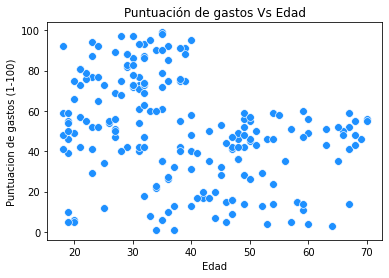

In [178]:
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=X, s=60, color="dodgerblue")

plt.xlabel('Edad')
plt.ylabel('Puntuacion de gastos (1-100)')
plt.title('Puntuación de gastos Vs Edad')

plt.show()

In [179]:
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(X)

C:\Users\victo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


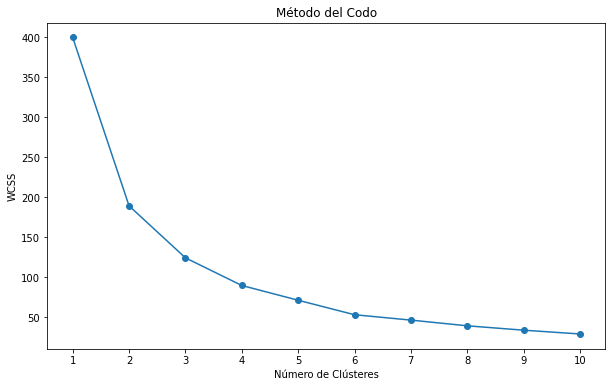

In [180]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, random_state=42)
    k_means.fit(datos_escalados)
    wcss.append(k_means.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()    
    

In [181]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(datos_escalados)

datos['Cluster'] = clusters


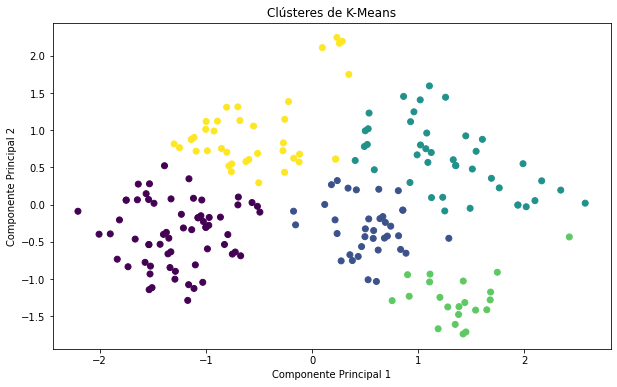

In [182]:
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_escalados)
plt.figure(figsize=(10, 6))
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c=datos['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clústeres de K-Means')
plt.show()


In [183]:
coef_silhouette = silhouette_score(datos_escalados, clusters)
indice_calinski = calinski_harabasz_score(datos_escalados, clusters)
indice_davies = davies_bouldin_score(datos_escalados, clusters)


print(f'Coeficiente de Silhouette: {coef_silhouette}')
print(f'Índice de Calinski-Harabasz: {indice_calinski}')
print(f'Índice de Davies-Bouldin: {indice_davies}')

Coeficiente de Silhouette: 0.44754858878462783
Índice de Calinski-Harabasz: 224.75929539265545
Índice de Davies-Bouldin: 0.7570538193682086


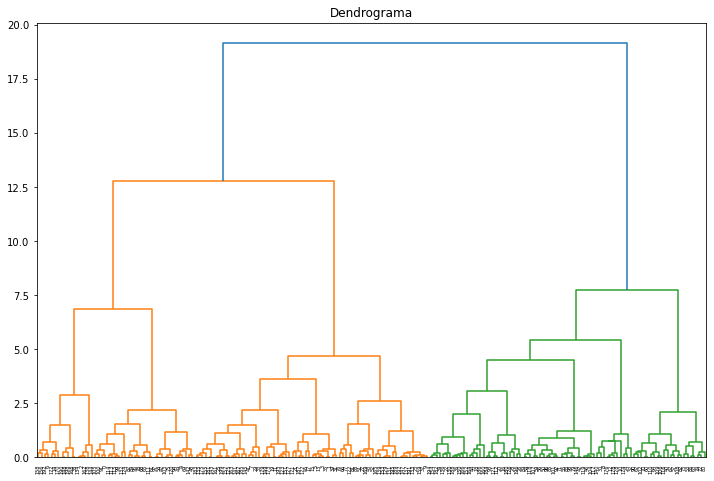

In [187]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(datos_escalados, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.show()


In [188]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 6  # Se corta el denograma en 5, dando como resultado 6 nodos
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = hierarchical_clustering.fit_predict(datos_escalados)

datos['Cluster'] = cluster_labels


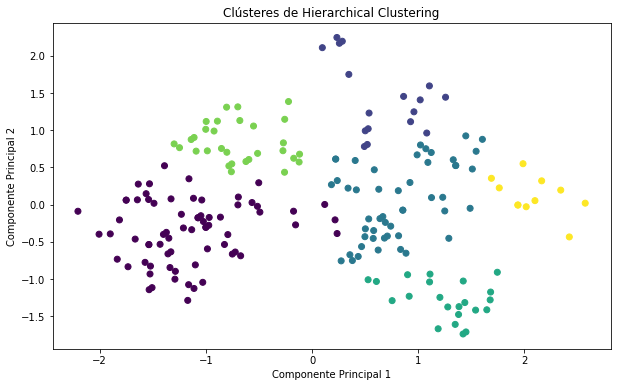

In [189]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_escalados)

plt.figure(figsize=(10, 6))
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c=datos['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clústeres de Hierarchical Clustering')
plt.show()


In [190]:
coef_silhouette_hc = silhouette_score(datos_escalados, cluster_labels)
indice_calinski_hc = calinski_harabasz_score(datos_escalados, cluster_labels)
indice_davies_hc = davies_bouldin_score(datos_escalados, cluster_labels)


print(f'Coeficiente de Silhouette (HC): {coef_silhouette_hc}')
print(f'Índice de Calinski-Harabasz (HC): {indice_calinski_hc}')
print(f'Índice de Davies-Bouldin (HC): {indice_davies_hc}')

Coeficiente de Silhouette (HC): 0.3990690566534328
Índice de Calinski-Harabasz (HC): 192.3496458925534
Índice de Davies-Bouldin (HC): 0.7639263331785862
